# **FINAL PROJECT DATA SCIENCE**

### DATAVERSE 11
### Hanindhiya Ika Septiana 
### Indra Aminudin 
### Rifza Anggriani 
### Zhafar Tri Adib

#### **Preparation**

In [6]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import Dataset 
data = pd.read_csv('https://raw.githubusercontent.com/zhafar3adib/belajar_datascience/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dataset berisi data nasabah berupa layanan yang digunakan dan status churn atau tidak

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
#Pengecekan Data Shape
data.shape

(7043, 21)

**Penjelasan** : Terdapat 21 Kolom dan 7043 Rows dari dataset Telco Customer Churn

In [11]:
# Pengecekan Atribut Kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Penjelasan** : Berdasarkan pengecekan terdapat 18 atribut kolom yang mempunyai data type object dan 2 atribut kolom yang mempunyai data type integer, 1 kolom mempunyai data type float, untuk kolom TotalCharge perlu dirubah ke dalam format float, untuk saat ini masih berupa data type object

In [12]:
# Pengecekan Data yang null/ N/A pada dataset
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Pengecekan Data yang null/ N/A pada dataset
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### **Duplicates**

In [14]:
# Duplicate check
data.duplicated().sum()

0

**Penjelasan** : Tidak ada kolom atribut yang duplikat

#### **Remove Blank Value**

In [15]:
#Check Blank value
data['TotalCharges'].str.contains(r'\s+').sum()

11

**Penjelasan** : Terdapat 11 Blank value yang perlu dibershikan dari kolom TotalCharge

In [16]:
#Remove Whitespace Value
data['TotalCharges'] = data['TotalCharges'].replace([' '],'0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

**Penjelasan**: Terdapat Blank value pada kolom TotalCharge, untuk tenure yang bernilai 0, oleh karena itu disii dengan nilai 0, serta mengubah tipe data menjadi numerik

#### **Data Visualisasi**

##### Bar Chart

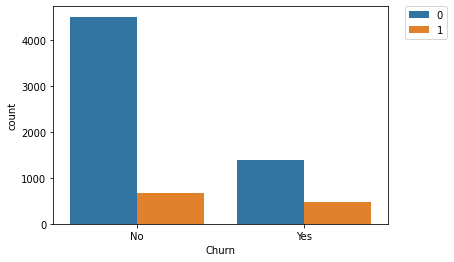

In [17]:
#perbandingan jumlah senior citizen dan bukan senior citizen yang churn
ax = sns.countplot(x="Churn",hue='SeniorCitizen', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

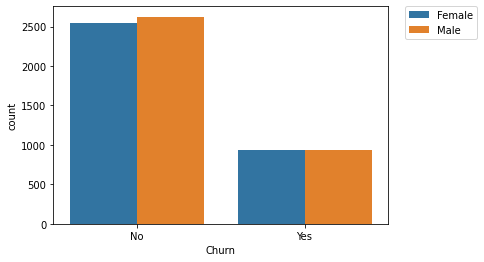

In [19]:
#perbandingan jumlah male dan female
ax = sns.countplot(x="Churn",hue='gender', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

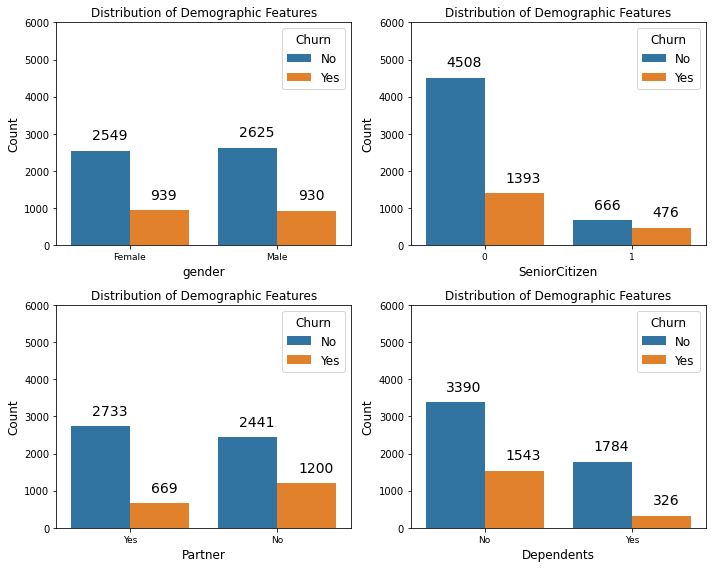

In [21]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']

plt.figure(figsize=(10,8))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = data, x = col, hue="Churn")

    plt.title ('Distribution of Demographic Features')
    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Count", fontsize= 12)
    plt.ylim(0,6000)
    plt.xticks(fontsize= 9)
    plt.legend(title = 'Churn', fontsize='large', title_fontsize='12')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

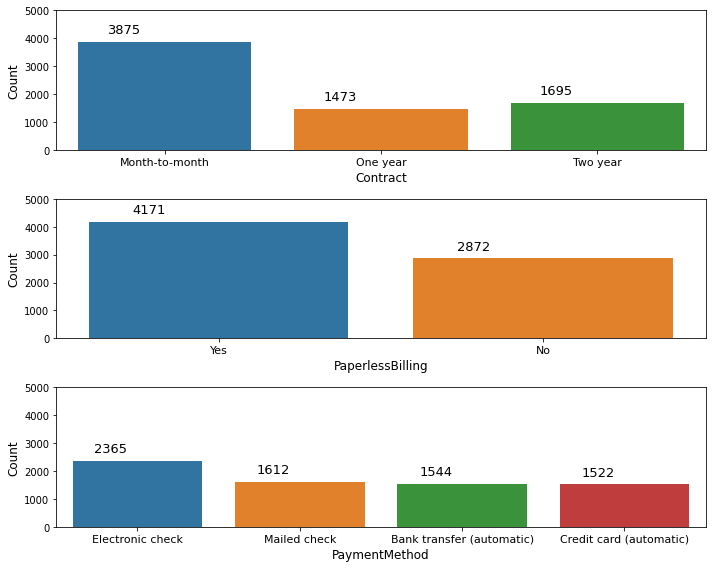

In [22]:
cat_accinfo_features = ['Contract','PaperlessBilling','PaymentMethod']
plt.figure(figsize=(10,8))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = data, x = col)

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Count", fontsize= 12)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

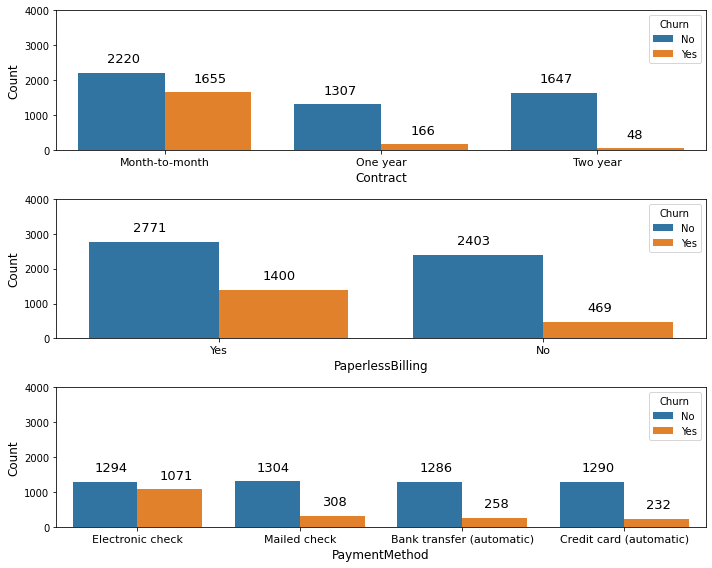

In [23]:
cat_accinfo_features = ['Contract','PaperlessBilling','PaymentMethod']

plt.figure(figsize=(10,8))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = data, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Count", fontsize= 12)
    plt.ylim(0,4000)
    plt.xticks(fontsize= 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

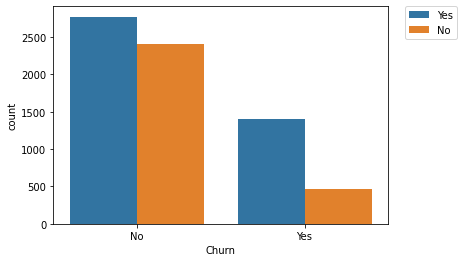

In [24]:
#perbandingan jumlah customer yang menggunakan paperless billing
ax = sns.countplot(x="Churn",hue='PaperlessBilling', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [25]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

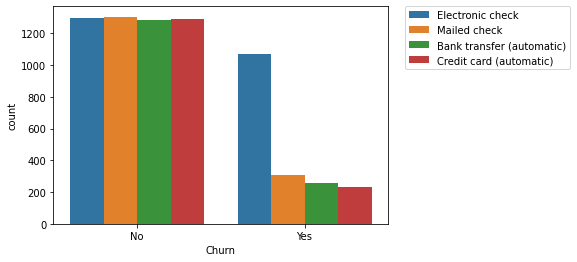

In [26]:
#perbandingan jumlah metode pembayaran
ax = sns.countplot(x="Churn",hue='PaymentMethod', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [27]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

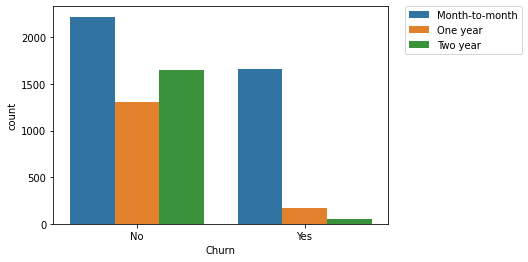

In [28]:
ax = sns.countplot(x="Churn",hue='Contract', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

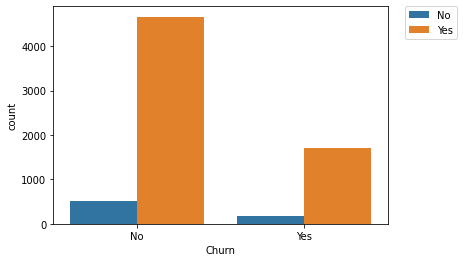

In [30]:
ax = sns.countplot(x="Churn",hue='PhoneService', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

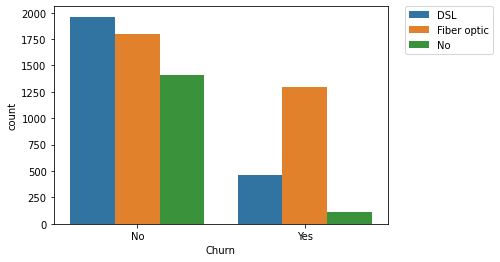

In [32]:
ax = sns.countplot(x="Churn",hue='InternetService', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

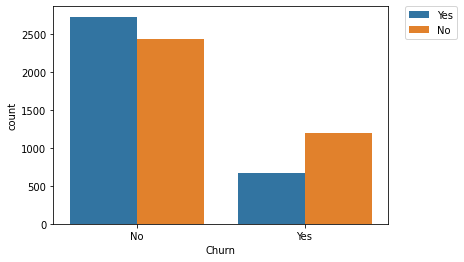

In [34]:
ax = sns.countplot(x="Churn",hue='Partner', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [35]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

##### Pie Chart

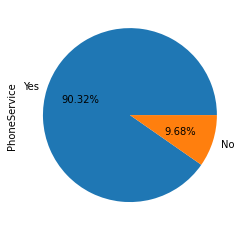

In [36]:
#perbandingan jumlah jenis kontrak yang dipilih customer
data['PhoneService'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [37]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

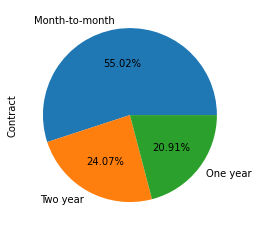

In [38]:
#perbandingan jumlah jenis kontrak yang dipilih customer
data['Contract'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [39]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

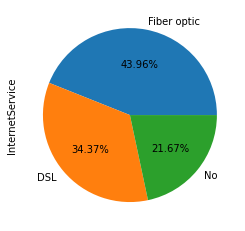

In [40]:
#perbandingan jenis layanan internet yang digunakan
data['InternetService'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [41]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

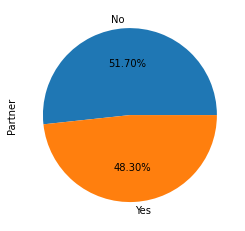

In [42]:
# Persentase Target Class
data['Partner'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [43]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

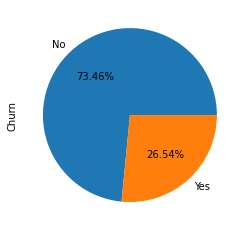

In [44]:
# Persentase Target Class
data['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [45]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Penjelasan** : Berdasarkan pengecekan menggunakan PIE Chart, untuk traget class Churn, persentase nya 73.46% No Churn, 26.54% Churn

##### **Box Plot**

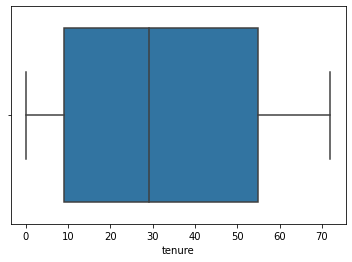

In [46]:
sns.boxplot(data.tenure)

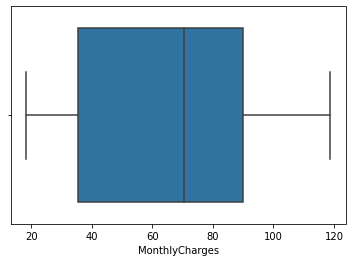

In [47]:
sns.boxplot(data.MonthlyCharges)

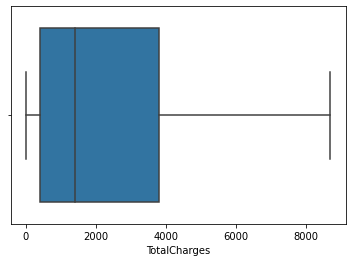

In [48]:
sns.boxplot(data.TotalCharges)

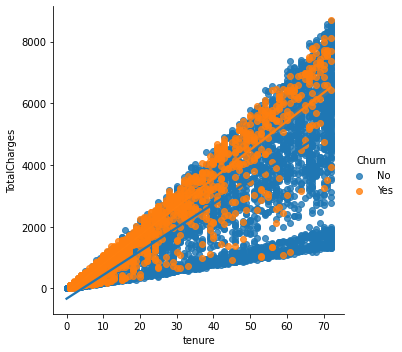

In [49]:
g = sns.lmplot(x="tenure", y="TotalCharges", hue="Churn", data=data)

#### Encoding kolom Categorical menjadi Numeric



In [50]:
#melakukan encode pada Colom Category menjadi numerical
categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


##### Correlation Heatmap

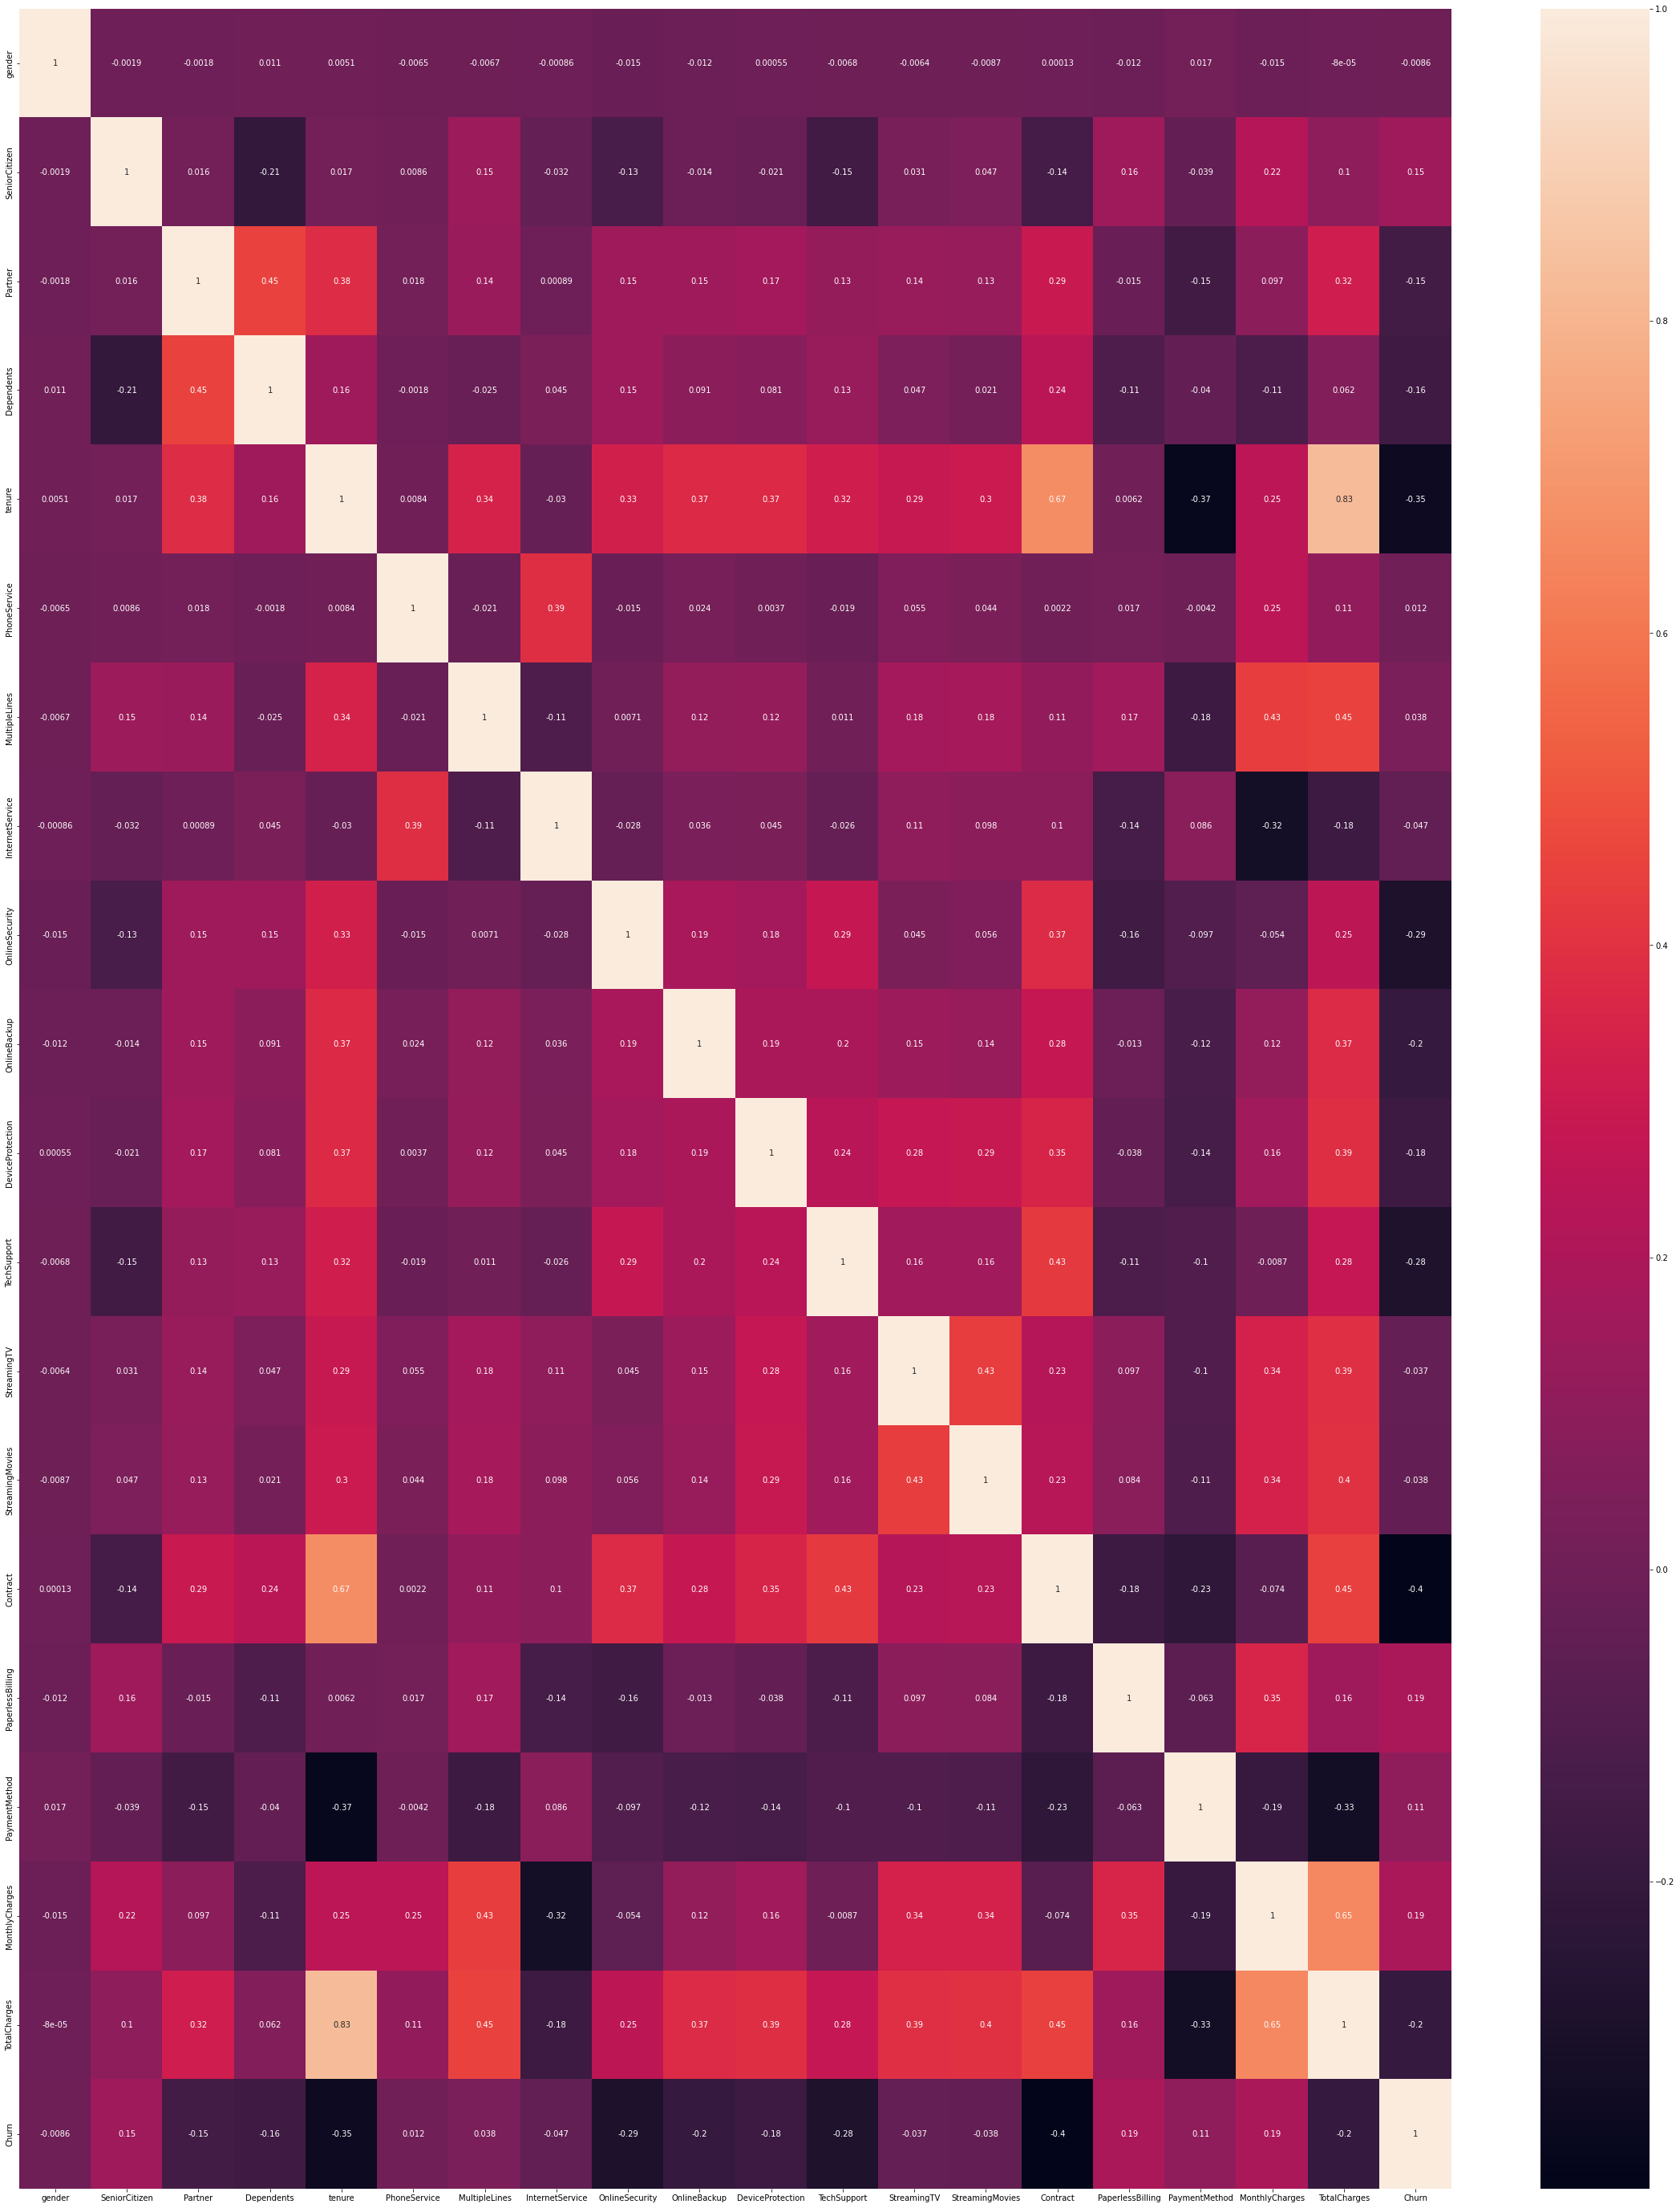

In [52]:
#Check Correlation antar variabel
plt.figure(figsize=(40,50))
sns.heatmap(data.corr(), annot=True)
plt.show()

##### Histogram Plot

**Analisa :** Berdasarkan pengecekan data dari kolom correlation, SeniorCitizen,PhoneService,MultipleLines,PaperlessBilling,PaymentMethod,MonthlyCharges memiliki korelasi positif terhadap Churn, sedangkan sisanya memiliki korelasi negatif

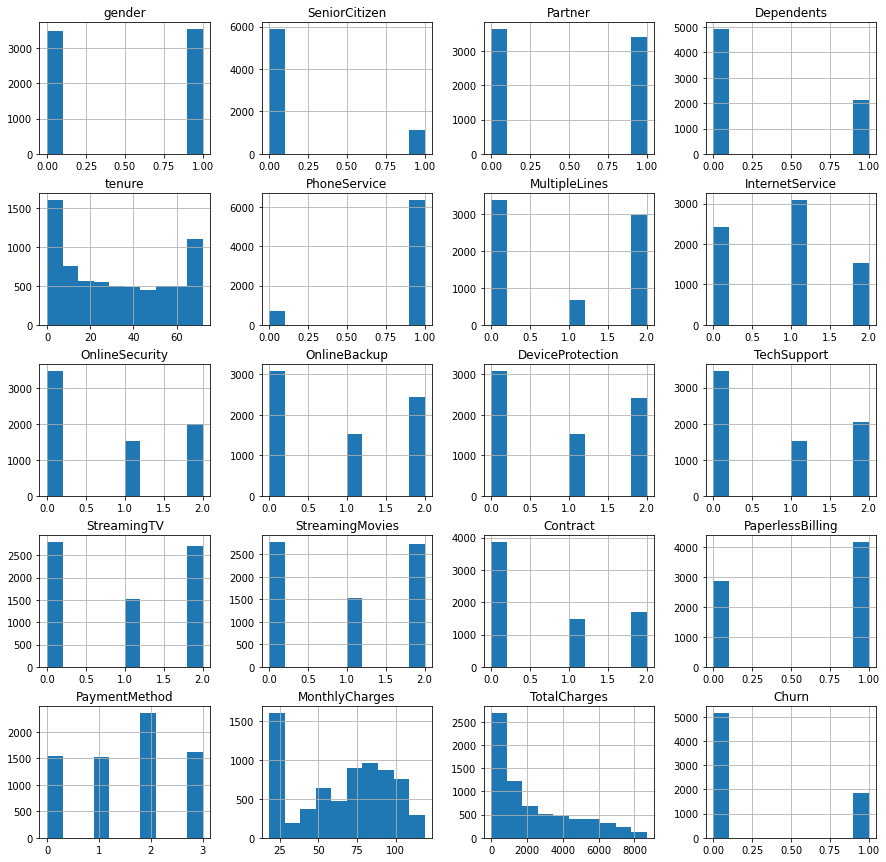

In [53]:
data.hist(figsize=(15,15))
plt.show()

##MODELING

###Logistic Regression

In [54]:
df_X = data.drop(['customerID',	'Churn'],axis=1)
df_y = data[['Churn']]

Accuracy  0.8102224325603408
Precision  0.7472368922867874
Recall  0.7339373625848389
Confusion matrix  [[1405  180]
 [ 221  307]]


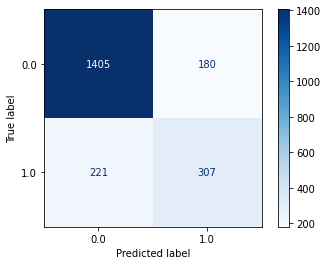

In [55]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing selesai

#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

              precision    recall  f1-score   support

           0      0.828     0.859     0.843      1539
           1      0.579     0.521     0.549       574

    accuracy                          0.767      2113
   macro avg      0.704     0.690     0.696      2113
weighted avg      0.760     0.767     0.763      2113

Accuracy  0.7671557027922385
Precision  0.5794573643410853
Recall  0.5209059233449478
Confusion matrix  [[1322  217]
 [ 275  299]]


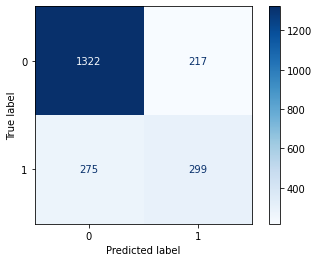

In [56]:
df_X = data.drop(['customerID',	'Churn'],axis=1)
df_y = data[['Churn']]

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train['Churn'])
y_train=le.transform(y_train['Churn'])
y_test=le.fit_transform(y_test['Churn'])
#buat dataframe baru
X_train_enc, X_train_sc = X_train.copy(), X_train.copy()
X_test_enc, X_test_sc = X_test.copy(), X_train.copy()
#categorical encoding
cats = X_train.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  cat_en.fit(X_train[i].values.reshape(-1, 1))
  X_train_enc[i] = cat_en.transform(X_train[i].values.reshape(-1, 1))
  X_test_enc[i] = cat_en.transform(X_test[i].values.reshape(-1, 1))

#scaling
scaler = StandardScaler().fit(X_train_enc)
X_train_sc = scaler.transform(X_train_enc)
X_test_sc = scaler.transform(X_test_enc)

#mulai learning 
model=MLPClassifier(max_iter=1000)

#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)
print(classification_report(y_test, y_pred, digits=3))
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_sc, y_test, cmap=plt.cm.Blues)  
plt.show()

###MLP for binary classification

Accuracy  0.8035967818267865
Precision  0.7392571890455248
Recall  0.708681053436574
f1 score  0.7209357314730216
Confusion matrix  [[1424  161]
 [ 254  274]]


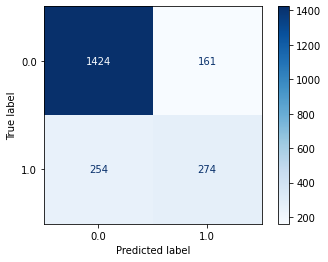

In [57]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning 
model=MLPClassifier()
#model=MLPClassifier(max_iter=1000, activation='logistic', hidden_layer_sizes=(200,100),random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###K Neighbour


Accuracy  0.7856128726928537
Precision  0.7117818624365269
Recall  0.6809058646400917
f1 score  0.692669347653334
Confusion matrix  [[1411  174]
 [ 279  249]]


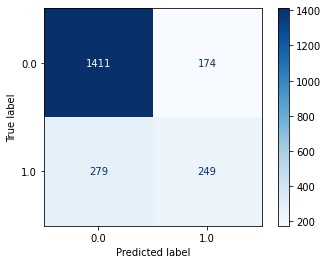

In [83]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Decision Tree

Accuracy  0.7998106956933271
Precision  0.732698306972194
Recall  0.713735541535226
f1 score  0.721977575901793
Confusion matrix  [[1404  181]
 [ 242  286]]


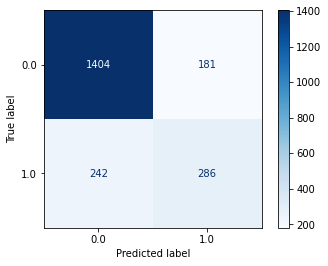

In [84]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=DecisionTreeClassifier(criterion="entropy", max_depth=100, max_leaf_nodes=100, random_state=1)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Random Forest

Accuracy  0.8064363464268812
Precision  0.7427817229181628
Recall  0.718151945320715
f1 score  0.7285192148510451
Confusion matrix  [[1418  167]
 [ 242  286]]


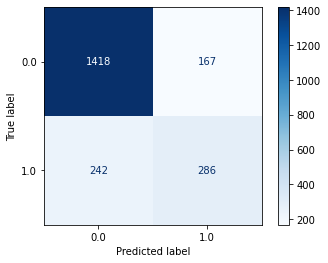

In [85]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Adaboost

Accuracy  0.8050165641268339
Precision  0.739994131455399
Recall  0.7247837204856132
f1 score  0.7316200045379659
Confusion matrix  [[1403  182]
 [ 230  298]]


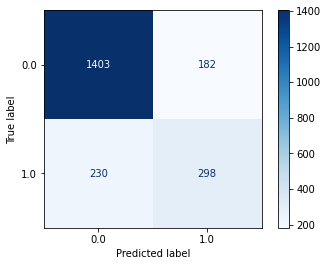

In [86]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###SVM for binary classification

Accuracy  0.8069096071935636
Precision  0.7456538799464305
Recall  0.7064686693432751
f1 score  0.7213201238197942
Confusion matrix  [[1438  147]
 [ 261  267]]


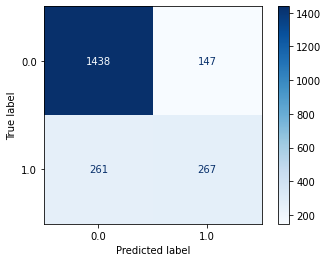

In [87]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning 
model=SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Gradient Boosting Classifier

Accuracy  0.8116422148603881
Precision  0.7501742549777742
Recall  0.7273055874199408
F1 Score  0.7371253060193602
Confusion matrix  [[1420  165]
 [ 233  295]]


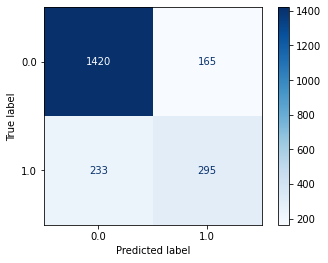

In [88]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning 
model=GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##MODEL + IMBALANCED DATA HANDLING

###SMOTE+ Logitic Regression

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7595835305253195
Precision  0.7168265934288273
Recall  0.776596405697352
f1 score  0.7250338647173704
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1585
         1.0       0.51      0.81      0.63       528

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1b9357ed0>


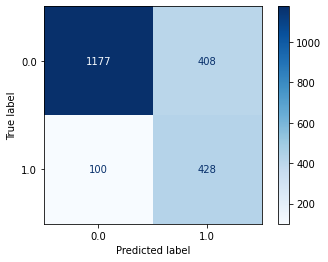

In [64]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###SMOTE+MLP

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7638428774254614
Precision  0.7061156505467145
Recall  0.7484914205142912
f1 score  0.7174765067725822
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1585
         1.0       0.52      0.72      0.60       528

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1bbc84250>


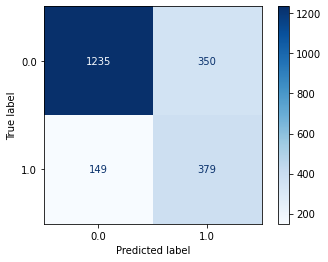

In [65]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=MLPClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7595835305253195
Precision  0.7168265934288273
Recall  0.776596405697352
f1 score  0.7250338647173704
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1585
         1.0       0.51      0.81      0.63       528

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1bbf06310>


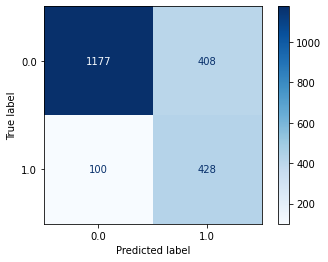

In [66]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###SMOTE+DT

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7624230951254141
Precision  0.7028863726340963
Recall  0.7424929500047797
f1 score  0.714059814406266
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1585
         1.0       0.52      0.70      0.60       528

    accuracy                           0.76      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.80      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1bea95b10>


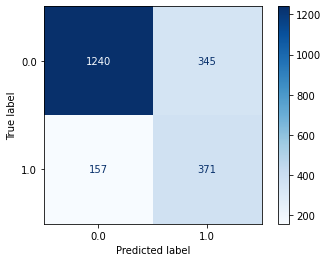

In [67]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=DecisionTreeClassifier(criterion="entropy", max_depth=100, max_leaf_nodes=100, random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))  
plt.show()

###SMOTE+RF

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7889256980596309
Precision  0.7222347318343874
Recall  0.7405816843514004
f1 score  0.730018334956741
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1585
         1.0       0.57      0.64      0.60       528

    accuracy                           0.79      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.80      0.79      0.79      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1beb57e50>


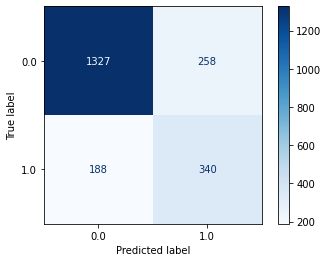

In [68]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))  
plt.show()

### SMOTE+SVM

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7562707051585423
Precision  0.7038312641192486
Recall  0.7522852738743906
f1 score  0.7140411386376029
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1585
         1.0       0.51      0.74      0.60       528

    accuracy                           0.76      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1bc151f50>


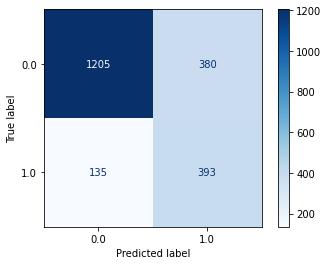

In [69]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=SVC()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))  
plt.show()

###SMOTE + GRADIENT BOOSTING

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7860861334595362
Precision  0.726587531954332
Recall  0.765843968071886
f1 score  0.7393169391747896
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      1585
         1.0       0.56      0.73      0.63       528

    accuracy                           0.79      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.79      0.79      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fe1bbfc6190>


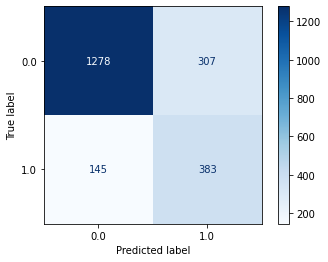

In [70]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=GradientBoostingClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###ADASYN + Logistic Regression

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7415996213913867
Precision  0.7098691048698186
Recall  0.7740817082496894
f1 score  0.711648164662505
Confusion matrix  [[1124  461]
 [  85  443]]


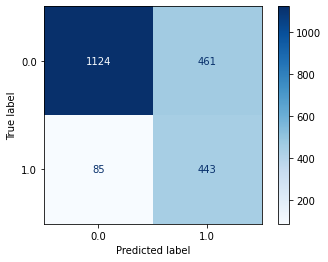

In [71]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + MLP

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7326076668244202
Precision  0.6925809470230768
Recall  0.7478796243188988
f1 score  0.6968161306633097
Confusion matrix  [[1137  448]
 [ 117  411]]


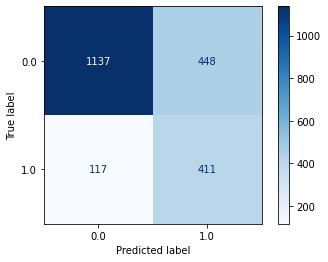

In [72]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=MLPClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + DT

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7510648367250355
Precision  0.7095491854513836
Recall  0.7683921231239843
f1 score  0.7163720752667757
Confusion matrix  [[1163  422]
 [ 104  424]]


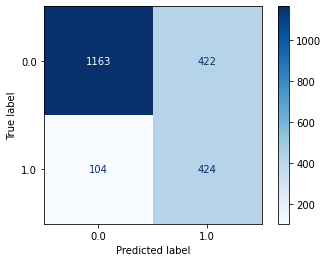

In [73]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=DecisionTreeClassifier(criterion="entropy", max_depth=100, max_leaf_nodes=100, random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + RF

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.77520113582584
Precision  0.7229212174166302
Recall  0.7743762546601662
f1 score  0.7351141502499943
Confusion matrix  [[1230  355]
 [ 120  408]]


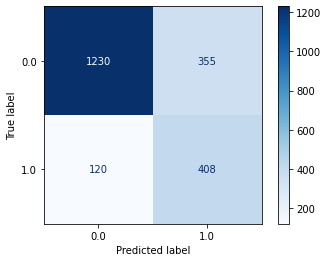

In [74]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + SVM

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7510648367250355
Precision  0.7031834690471805
Recall  0.7557618774495747
f1 score  0.7119080501243154
Confusion matrix  [[1183  402]
 [ 124  404]]


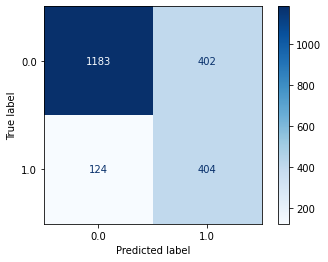

In [75]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=SVC()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + GRADIENT BOOSTING

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7785139611926172
Precision  0.7208423477283725
Recall  0.7639542108785011
f1 score  0.7334262811596266
Confusion matrix  [[1257  328]
 [ 140  388]]


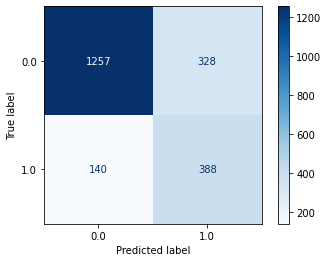

In [76]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=GradientBoostingClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Hypertuning GRID SEARCH CV
Kita memilih 2 metode yaitu:

*   Logistic Regression
*   Random Forest




#### SMOTE + Logistic Regression

In [77]:
model = LogisticRegression()

param_dist = {"max_iter": list(range(90,200)),
              "class_weight": ['balanced','dict']}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

LogisticRegression(class_weight='dict', max_iter=90)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Accuracy  0.7595835305253195
Precision  0.7168265934288273
Recall  0.776596405697352
F1 Score  0.7250338647173704
Confusion matrix  [[1177  408]
 [ 100  428]]


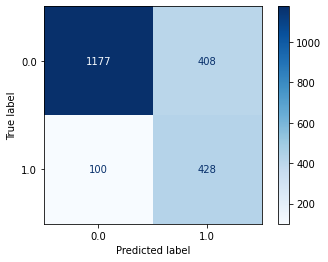

In [100]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression(class_weight='balanced', max_iter=90)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))      
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#### SMOTE + Random Forest

In [80]:
model = LogisticRegression()

param_dist = {"max_iter": list(range(90,110)),
              "class_weight": ['balanced','dict']}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

LogisticRegression(class_weight='dict', max_iter=90)

Accuracy  0.7799337434926644
Precision  0.7241507480385887
Recall  0.7705841936717331
F1 Score  0.7369676448880498
Confusion matrix  [[1251  334]
 [ 131  397]]


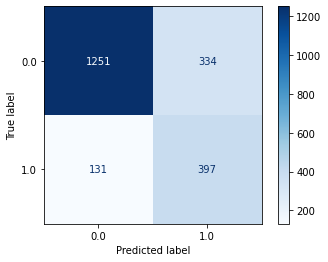

In [81]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))      
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#### SMOTE + Gradient Boosting

In [91]:
model = GradientBoostingClassifier()

param_dist = { "n_estimators": list(range(90,110)),
              "min_samples_leaf" : list(range(1, 5)),
              "loss": ['deviance', 'exponential']}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

GradientBoostingClassifier(loss='exponential', min_samples_leaf=2,
                           n_estimators=90)

Accuracy  0.7879791765262659
Precision  0.7311920479414067
Recall  0.7759469696969697
F1 Score  0.7445787085605247
Confusion matrix  [[1268  317]
 [ 131  397]]


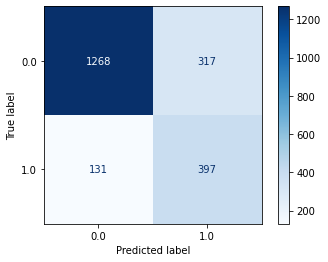

In [94]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=GradientBoostingClassifier(n_estimators=90,min_samples_leaf=2,loss='exponential')
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))      
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [6.20554800e-01 1.12282180e+02 9.94953886e+01 1.14590516e+02
 6.78283600e+02 1.67803843e+00 8.96278868e+00 1.20592418e+01
 4.33813598e+02 1.88828376e+02 1.59749338e+02 4.09222757e+02
 7.91369289e+00 5.21332890e+00 8.98443892e+02 1.65266998e+02
 5.12096671e+01 1.94743699e+02 1.87641444e+02]


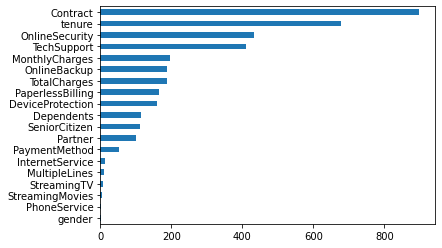

In [101]:
#logistic
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

filter = SelectKBest(f_classif, k=10)
filter.fit(X_train, y_train)

X_train_filter = filter.transform(X_train)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_filter.shape)

print("Score of features", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.807382867960246
Precision  0.743343244262362
Recall  0.7282555444030208
Confusion matrix  [[1405  180]
 [ 227  301]]


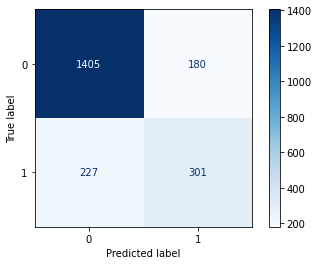

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [102]:
scaler = MinMaxScaler().fit(X_train_filter)
X_train = scaler.transform(X_train_filter)
X_test = scaler.transform(X_test_filter)

# modelling with logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
#random forest
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

filter = SelectKBest(f_classif, k=10)
filter.fit(X_train, y_train)

X_train_filter = filter.transform(X_train)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_filter.shape)

print("Score of features", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.8050165641268339
Precision  0.7397987194610756
Recall  0.7317303556065385
Confusion matrix  [[1392  193]
 [ 219  309]]


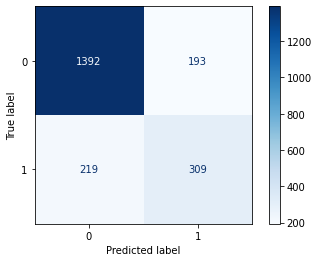

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.59      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [103]:
scaler = MinMaxScaler().fit(X_train_filter)
X_train = scaler.transform(X_train_filter)
X_test = scaler.transform(X_test_filter)

# modelling with logistic regression
clf = MLPClassifier(max_iter=1000, activation='logistic', hidden_layer_sizes=(200,100),random_state=1)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 5)
Score of features [13  1  6  2  7  3  5  9  1  4  8  1 14 12  1  1 10 11 15]


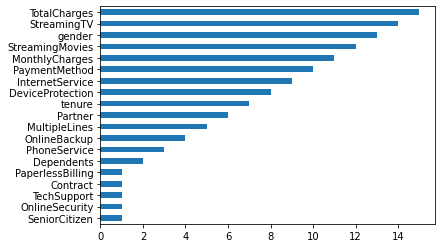

In [104]:
#logistic
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = LogisticRegression()
wrapper = RFE(clf, n_features_to_select=5)
wrapper.fit(X_train, y_train)

X_train_wrapper = wrapper.transform(X_train)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_wrapper.shape)

print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.792238523426408
Precision  0.7219836976936369
Recall  0.7118457843418411
Confusion matrix  [[1383  202]
 [ 237  291]]


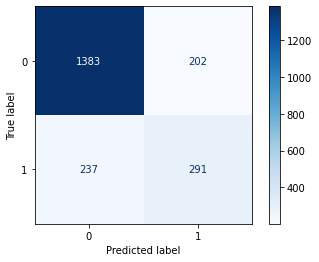

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1585
           1       0.59      0.55      0.57       528

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [105]:
scaler = MinMaxScaler().fit(X_train_wrapper)
X_train = scaler.transform(X_train_wrapper)
X_test = scaler.transform(X_test_wrapper)

# modelling with logistic regression
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [ 8  5  7  9  1 10  3  1  1  1  2  1  6  1  1  4  1  1  1]


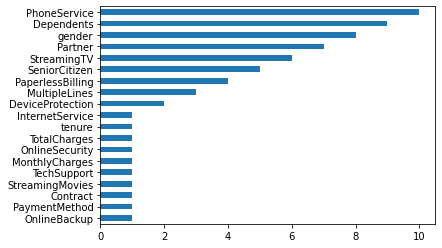

In [106]:
#random forest
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)
wrapper = RFE(clf, n_features_to_select=10)
wrapper.fit(X_train, y_train)

X_train_wrapper = wrapper.transform(X_train)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_wrapper.shape)

print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.8102224325603408
Precision  0.748806348179883
Recall  0.7206756046267087
Confusion matrix  [[1426  159]
 [ 242  286]]


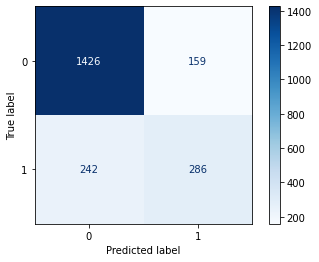

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1585
           1       0.64      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [107]:
scaler = MinMaxScaler().fit(X_train_wrapper)
X_train = scaler.transform(X_train_wrapper)
X_test = scaler.transform(X_test_wrapper)

# modelling with logistic regression
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 6)

Coef [-3.78927619e-02  2.87441835e-01  3.11971214e-02 -1.40476032e-01
 -6.42317352e-02 -3.86008307e-01  1.26863358e-01  5.70643141e-02
 -3.02483322e-01 -1.32751656e-01 -1.22698492e-01 -3.16891240e-01
  3.37092691e-02  8.64232152e-02 -6.80667923e-01  3.17531663e-01
 -5.83750623e-02  1.44495314e-02  3.71030008e-04]
Treshold 0.1682909404160835


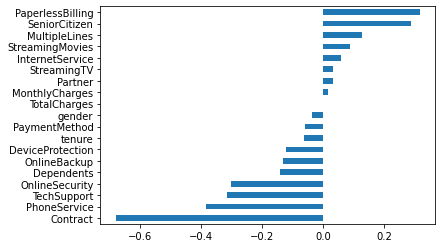

In [108]:
#logistic
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = LogisticRegression()
clf_feature = SelectFromModel(clf)

clf_feature.fit(X_train, y_train)

X_train_importance = clf_feature.transform(X_train)
X_test_importance = clf_feature.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_importance.shape)
print()

print("Coef",clf_feature.estimator_.coef_[0])
print("Treshold",clf_feature.threshold_)

feature_importance = pd.Series(clf_feature.estimator_.coef_[0], index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [ ]:
scaler = MinMaxScaler().fit(X_train_importance)
X_train = scaler.transform(X_train_importance)
X_test = scaler.transform(X_test_importance)

# modelling with logistic regression
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
ex_kf = KFold(n_splits=15, shuffle=True).split(range(20))

# show the training and testing set
print('{} {:^61} {}'.format("Iteration","Training set observation","Testing set observation"))

for i, k in enumerate(ex_kf, start=1):
  print("{:^9} {} {:^25}".format(i, k[0], str(k[1])))

In [ ]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=15, scoring='roc_auc')
print(scores)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

In [ ]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)

scores = cross_val_score(model, X, y, cv=15, scoring='roc_auc')
print(scores)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))